## Bivariate Analysis

Through bivariate analysis we try to analyze two variables simultaneously. As opposed to univariate analysis where we check the characteristics of a single variable, in bivariate analysis we try to determine if there is any relationship between two variables.

 

There are essentially 3 major scenarios that we will come accross when we perform bivariate analysis

Both variables of interest are qualitative
One variable is qualitative and the other is quantitative
Both variables are quantitative
 

For the purpose of this exercise, we will explore few most popular techniques to perform bivariate analysis.

The following plots are not limited to the headings they are under. They are the options we have if we face a certain scenario.

Numerical vs. Numerical
1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

Categorical vs. Numerical
1. Bar chart
2. Voilin plot
3. Categorical box plot
4. Swarm plot

## Two Categorcal Variables
1. Bar chart
2. Grouped bar chart
3. Point plot

## Case Study (Suicide Rates Overview 1985 to 2016)

Our aim is to explore the data of suicide rates.

Lets start using the above techniques on a practical dataset. We will be using data about suicide rates from 1985 to 2026.

source: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


Dataset Feature List

country

year

sex

age

suicides_no

population

suicides/100k pop

country-year

HDI for year

gdp_for_year

gdp_per_capita

generation

In [2]:
##  Loading the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("master.csv")

In [5]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
## check the data.describe()
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [7]:
## check the columns
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
# Checking the shape of data
data.shape

(27820, 12)

In [10]:
# Count the datatypes 
data.dtypes.value_counts()

object     6
int64      4
float64    2
Name: count, dtype: int64

# 1.8 Check the data set information?

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [13]:
## Checking the dataset missing values ?

In [14]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False) # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # percentage of values that are null
    missing_data = pd.concat([total, percent], axis =1, keys=['Total','Percent']) # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
HDI for year,19456,0.699353
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
gdp_for_year ($),0,0.000000


In [15]:
data[['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']].describe() # descriptive stats of continuous columns

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


## Frequency table for Age ?

One - Way Tables

In [16]:
my_tab = pd.crosstab(index=data["age"],  # Make a crosstab
                    columns= "count")   # Name the count column

my_tab

col_0,count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


In [17]:
## Bar plot to check Number of Suicides by top Countries 10 

In [18]:
### This is an example of Numerical vs Categorical

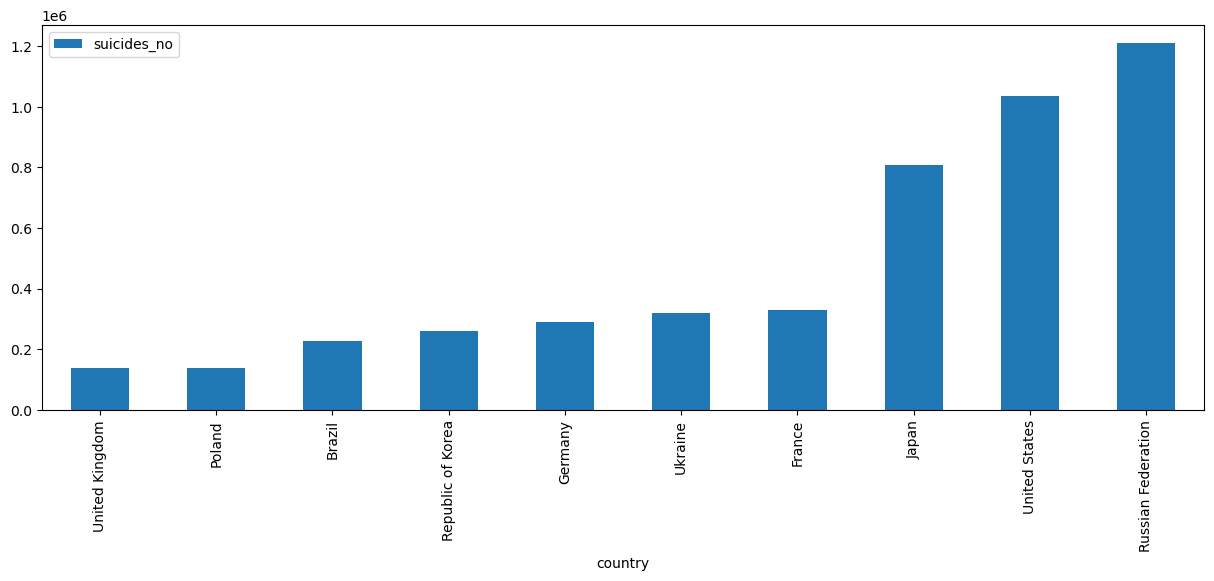

In [19]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='country',
                                                                                                           y='suicides_no',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

<font color = darkblue>

* Russia has the highest number of suicides followed by the US and Japan
* Russia, the US and Japan have exceptionally high counts of suicides compared to the others in the lot

In [21]:
##  Bar plot to check Number of Suicides by bottom Countries 10

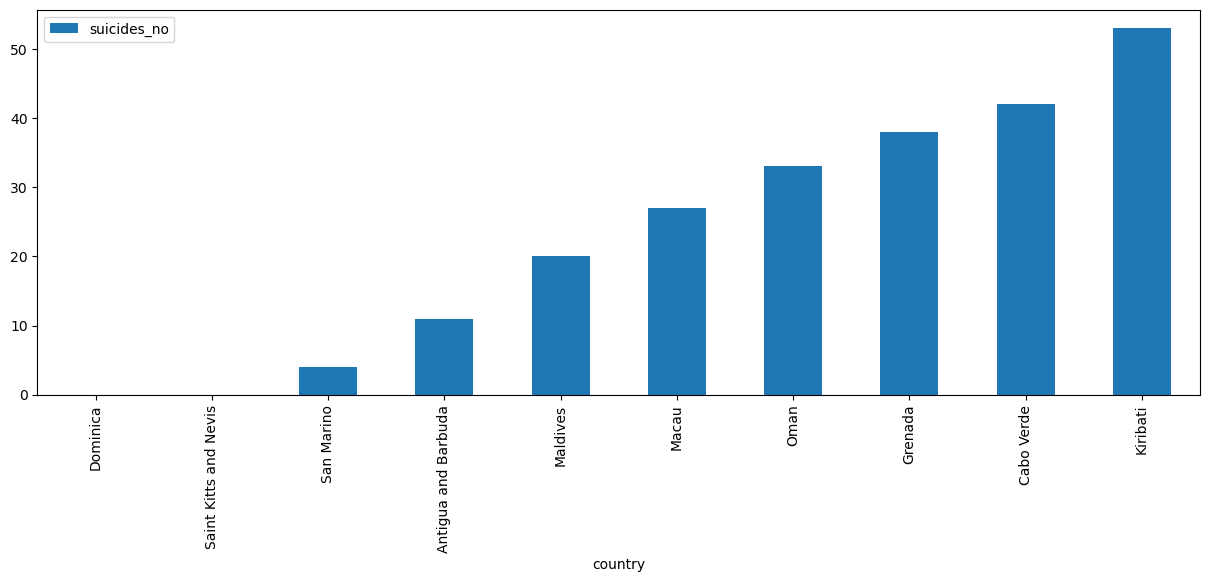

In [22]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    ascending=True).head(10).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5))

plt.show()

In [23]:
## Bar plot for Number of Suicides Vs Age

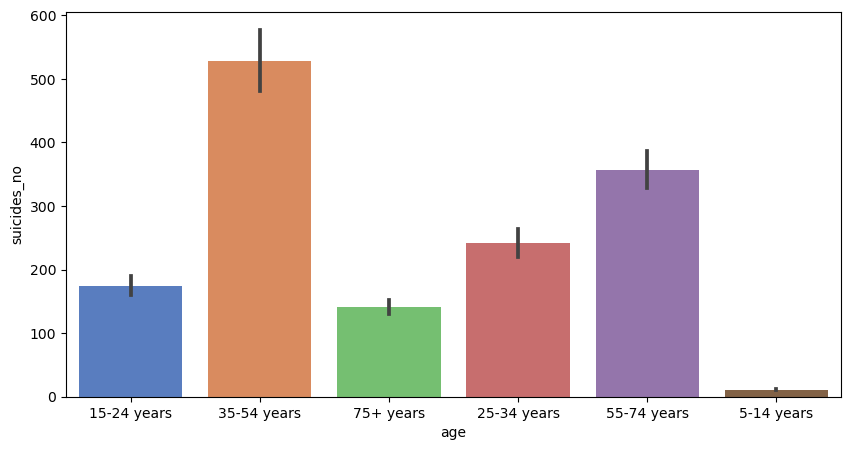

In [26]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='age', y='suicides_no', data=data, palette='muted')  # barplot

In [27]:
## Bar plot Number of Suicides Vs SEX

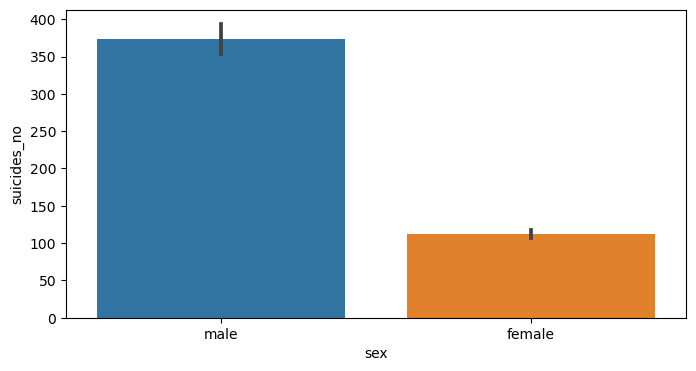

In [28]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="sex", y="suicides_no", data=data)